Title: Popular Classification Algorithms

Support Vector Machines (SVM)

Task 1: Identify handwriting on checks and classify each letter.

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



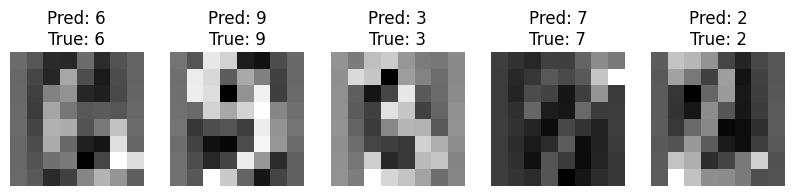

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
digits = datasets.load_digits()
X = digits.data  # Features: pixel values
y = digits.target  # Labels: digit class (0-9)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for models like SVM, logistic regression, etc.)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier (or any other model of your choice)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize some test results
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray)
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    ax.axis('off')
plt.show()



Task 2: Detect gender of a speaker based on voice data.

In [3]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = {
    'pitch': [150, 200, 180, 210, 170, 160, 190, 205, 180, 160],
    'frequency': [100, 120, 110, 125, 105, 130, 115, 135, 125, 110],
    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female']
}

df = pd.DataFrame(data)

# Features and labels
X = df[['pitch', 'frequency']]  # Features
y = df['gender']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

      female       0.50      0.50      0.50         2
        male       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



Task 3: Classify email topics based on content.

In [4]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Example email dataset
# Replace this with your actual dataset (e.g., df = pd.read_csv('emails.csv'))
data = {
    'email_content': [
        "Meetings are scheduled for the next week.",
        "Your account has been credited with $500.",
        "This is a reminder for your upcoming appointment.",
        "The project deadline has been extended.",
        "Here's a summary of the recent updates to your account.",
        "Click here to claim your prize!",
        "Your weekly news update is here.",
        "This is an important offer you don't want to miss.",
        "Your bill is overdue, please make the payment.",
        "Confirm your email address to receive the latest newsletter."
    ],
    'topic': ['Meeting', 'Account Update', 'Appointment', 'Project', 'Account Update', 'Spam', 'News', 'Spam', 'Billing', 'News']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df['email_content']  # Email content
y = df['topic']  # Email topic labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.00
Classification Report:
                precision    recall  f1-score   support

Account Update       0.00      0.00      0.00       1.0
       Billing       0.00      0.00      0.00       1.0
          News       0.00      0.00      0.00       0.0
          Spam       0.00      0.00      0.00       1.0

      accuracy                           0.00       3.0
     macro avg       0.00      0.00      0.00       3.0
  weighted avg       0.00      0.00      0.00       3.0



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python